In [1]:
################################################################
# Import Python Libraries
################################################################
import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

from Configure.Constants  import *
from Configure.AtomicData import *
from Configure.PlanetData  import *
from Configure.Conversions import amu2GeV

# Capture rate computation without darkphoton

Here we will tweak the DarkCapPy code to compute the capture rate assuming a constant cross-section for the $\chi$-SM scattering.

$\sigma^{SI} = 10^{-42} cm^2$


### Third attempt

We'll go for the same code as the first attempt.

One thing that annoyed me in the way we computed the capture rate in the first attempt, was the fact that the cross section between DM and SM should depend on the amount of nucleon in the element that we consider.

In the first attempt, the cross section was the same for every element, and I could not get my head around the fact that to me, more nucleon means a larger cross section.

Following Wikström and Edsjö's standard calculation, we can express the spin-independent cross section on a nucleus with atomic number A as : (https://arxiv.org/abs/0903.2986v2)

\begin{equation}
    \sigma^{SI}_{\chi A} = \sigma^{SI}A^2\frac{(m_\chi m_A)^2}{(m_\chi + m_A)^2}\frac{(m_\chi + m_p)^2}{(m_\chi m_p)^2} =  \sigma^{SI}A^2\left(\frac{m_\chi + m_p}{m_\chi + m_A}\frac{m_A}{m_p}\right)^2
\end{equation}

where $m_p$ is the proton mass

This time the equation will be :

\begin{equation}
    C_{Cap}^N = n_\chi\sigma_{\chi A}^{SI}\int_0^{R_\oplus}dr4\pi r^2n_N(r)\int_0^{\min(v_{gal},u_{int})} 4\pi u^2f_\oplus(u)\frac{u^2 + v_\oplus^2(r)}{u}
\end{equation}

Let's try it out :


In [3]:
def crossSection(element, mx) :
    A = atomicNumbers[element]
    sigma = 1e-42* (5.06 * 10 ** 13) ** 2 #cm^2 to GeV^-2
    mp = 0.938272
    ma = amu2GeV(A)
    
    crossSection = sigma * A **2 * ((mx + mp) * ma / (mx + ma ) / mp) **2
    
    return crossSection

Because the cross section does not depend on the velocity nor the radius at which we evaluate it, we can easily reuse the data we got from the first try.

In this case, we do not want the 1e-42 to appear in the velocity integral. So we can simply multiply all previously computed values by 1e42.

In [4]:
mx = np.logspace(1, 2, 20)

In [5]:
sumOverRadi = pd.read_csv('data/NP1sumOverRadi', index_col = 0)*1e42
sumOverRadi

,O16,Na,Mg,Al,Si,P,S,Ca,Cr,Fe,Ni
0,4.149594e+41,1.576543e+38,1.046737e+40,5.863639e+38,5.437926e+39,2.657277e+37,1.842081e+38,1.237600e+38,2.044214e+37,1.247996e+39,6.241012e+37
1,1.632302e+42,2.984075e+38,1.903307e+40,9.738858e+38,8.824612e+39,4.146362e+37,2.784913e+38,1.722399e+38,2.669958e+37,1.608103e+39,7.972697e+37
2,1.346273e+43,6.534525e+38,3.935056e+40,1.776240e+39,1.559989e+40,6.958211e+37,4.484800e+38,2.496655e+38,3.578628e+37,2.120270e+39,1.040281e+38
3,4.181565e+44,1.782523e+39,9.822176e+40,3.688235e+39,3.099771e+40,1.286894e+38,7.846885e+38,3.809387e+38,4.950811e+37,2.874766e+39,1.392631e+38
4,1.585547e+44,7.030672e+39,3.317945e+41,9.266762e+39,7.288857e+40,2.725195e+38,1.536858e+39,6.208470e+38,7.122945e+37,4.033910e+39,1.923742e+38
5,6.408989e+42,5.833855e+40,1.972507e+42,3.165505e+40,2.228482e+41,7.053228e+38,3.536557e+39,1.103869e+39,1.076552e+38,5.907632e+39,2.762616e+38
6,1.033733e+42,1.788781e+42,4.428243e+43,1.925672e+41,1.085799e+42,2.531809e+39,1.043263e+40,2.211276e+39,1.733027e+38,9.132401e+39,4.165511e+38
7,2.998570e+41,6.615151e+41,1.449995e+44,4.562530e+42,1.478789e+43,1.695416e+40,4.737144e+40,5.263062e+39,3.030762e+38,1.513901e+40,6.685067e+38
8,1.187066e+41,2.701726e+40,5.359905e+42,1.328455e+43,1.300282e+44,4.002905e+41,5.318136e+41,1.641790e+40,5.932177e+38,2.753825e+40,1.164318e+39
9,5.696784e+40,4.377793e+39,6.134969e+41,4.537172e+41,1.203803e+43,4.914200e+41,4.429260e+42,8.322964e+40,1.363919e+39,5.695679e+40,2.265964e+39


Now we need to take the cross section in account, before we sum on all elements.
We simply multiply the capture rate per element found in try 1 by the cross section between DM and this element.

In [6]:
def singleElementCap(element, m_X):
	'''
	singleElementCap(element, m_X)

	Returns the capture rate due to a single element for the specified parameters

	[m_X] = GeV
	'''
	n_X = 0.3/m_X # GeV/cm^3

	conversion = (5.06e13)**-3 * (1.52e24) # Conversion to seconds (cm^-3)(GeV^-2) -> (s^-1)
	prefactors = (4*np.pi)**2
	function = n_X * conversion * prefactors * sumOverRadi[element][np.where(mx == m_X)[0]] * crossSection(element, m)
	return function

In [7]:
########################
# Full Capture Rate
########################
def cCap(m_X):
	'''
	cCap(m_X, m_A, epsilon, alpha, alpha_X)

	returns the full capture rate in sec^-1 for the specified parameters

	Note: This function is the less efficient way to perform this calculation. Every point in (m_A, epsilon) space 
		involves peforming the full tripple integral over recoil energy, incident DM velocity, and Earth radius
		which is time consuming.

	[m_X] = GeV
	'''
	totalCap = 0
	for element in element_List:
		elementCap = singleElementCap(element, m_X)
		totalCap += elementCap 
	return totalCap


And now we can compute the total capture rate very quickly

In [8]:
capNoPhoton = np.empty_like(mx)

In [9]:
for i, m in enumerate(mx) :
    capNoPhoton[i] = cCap(m)


And plot it !

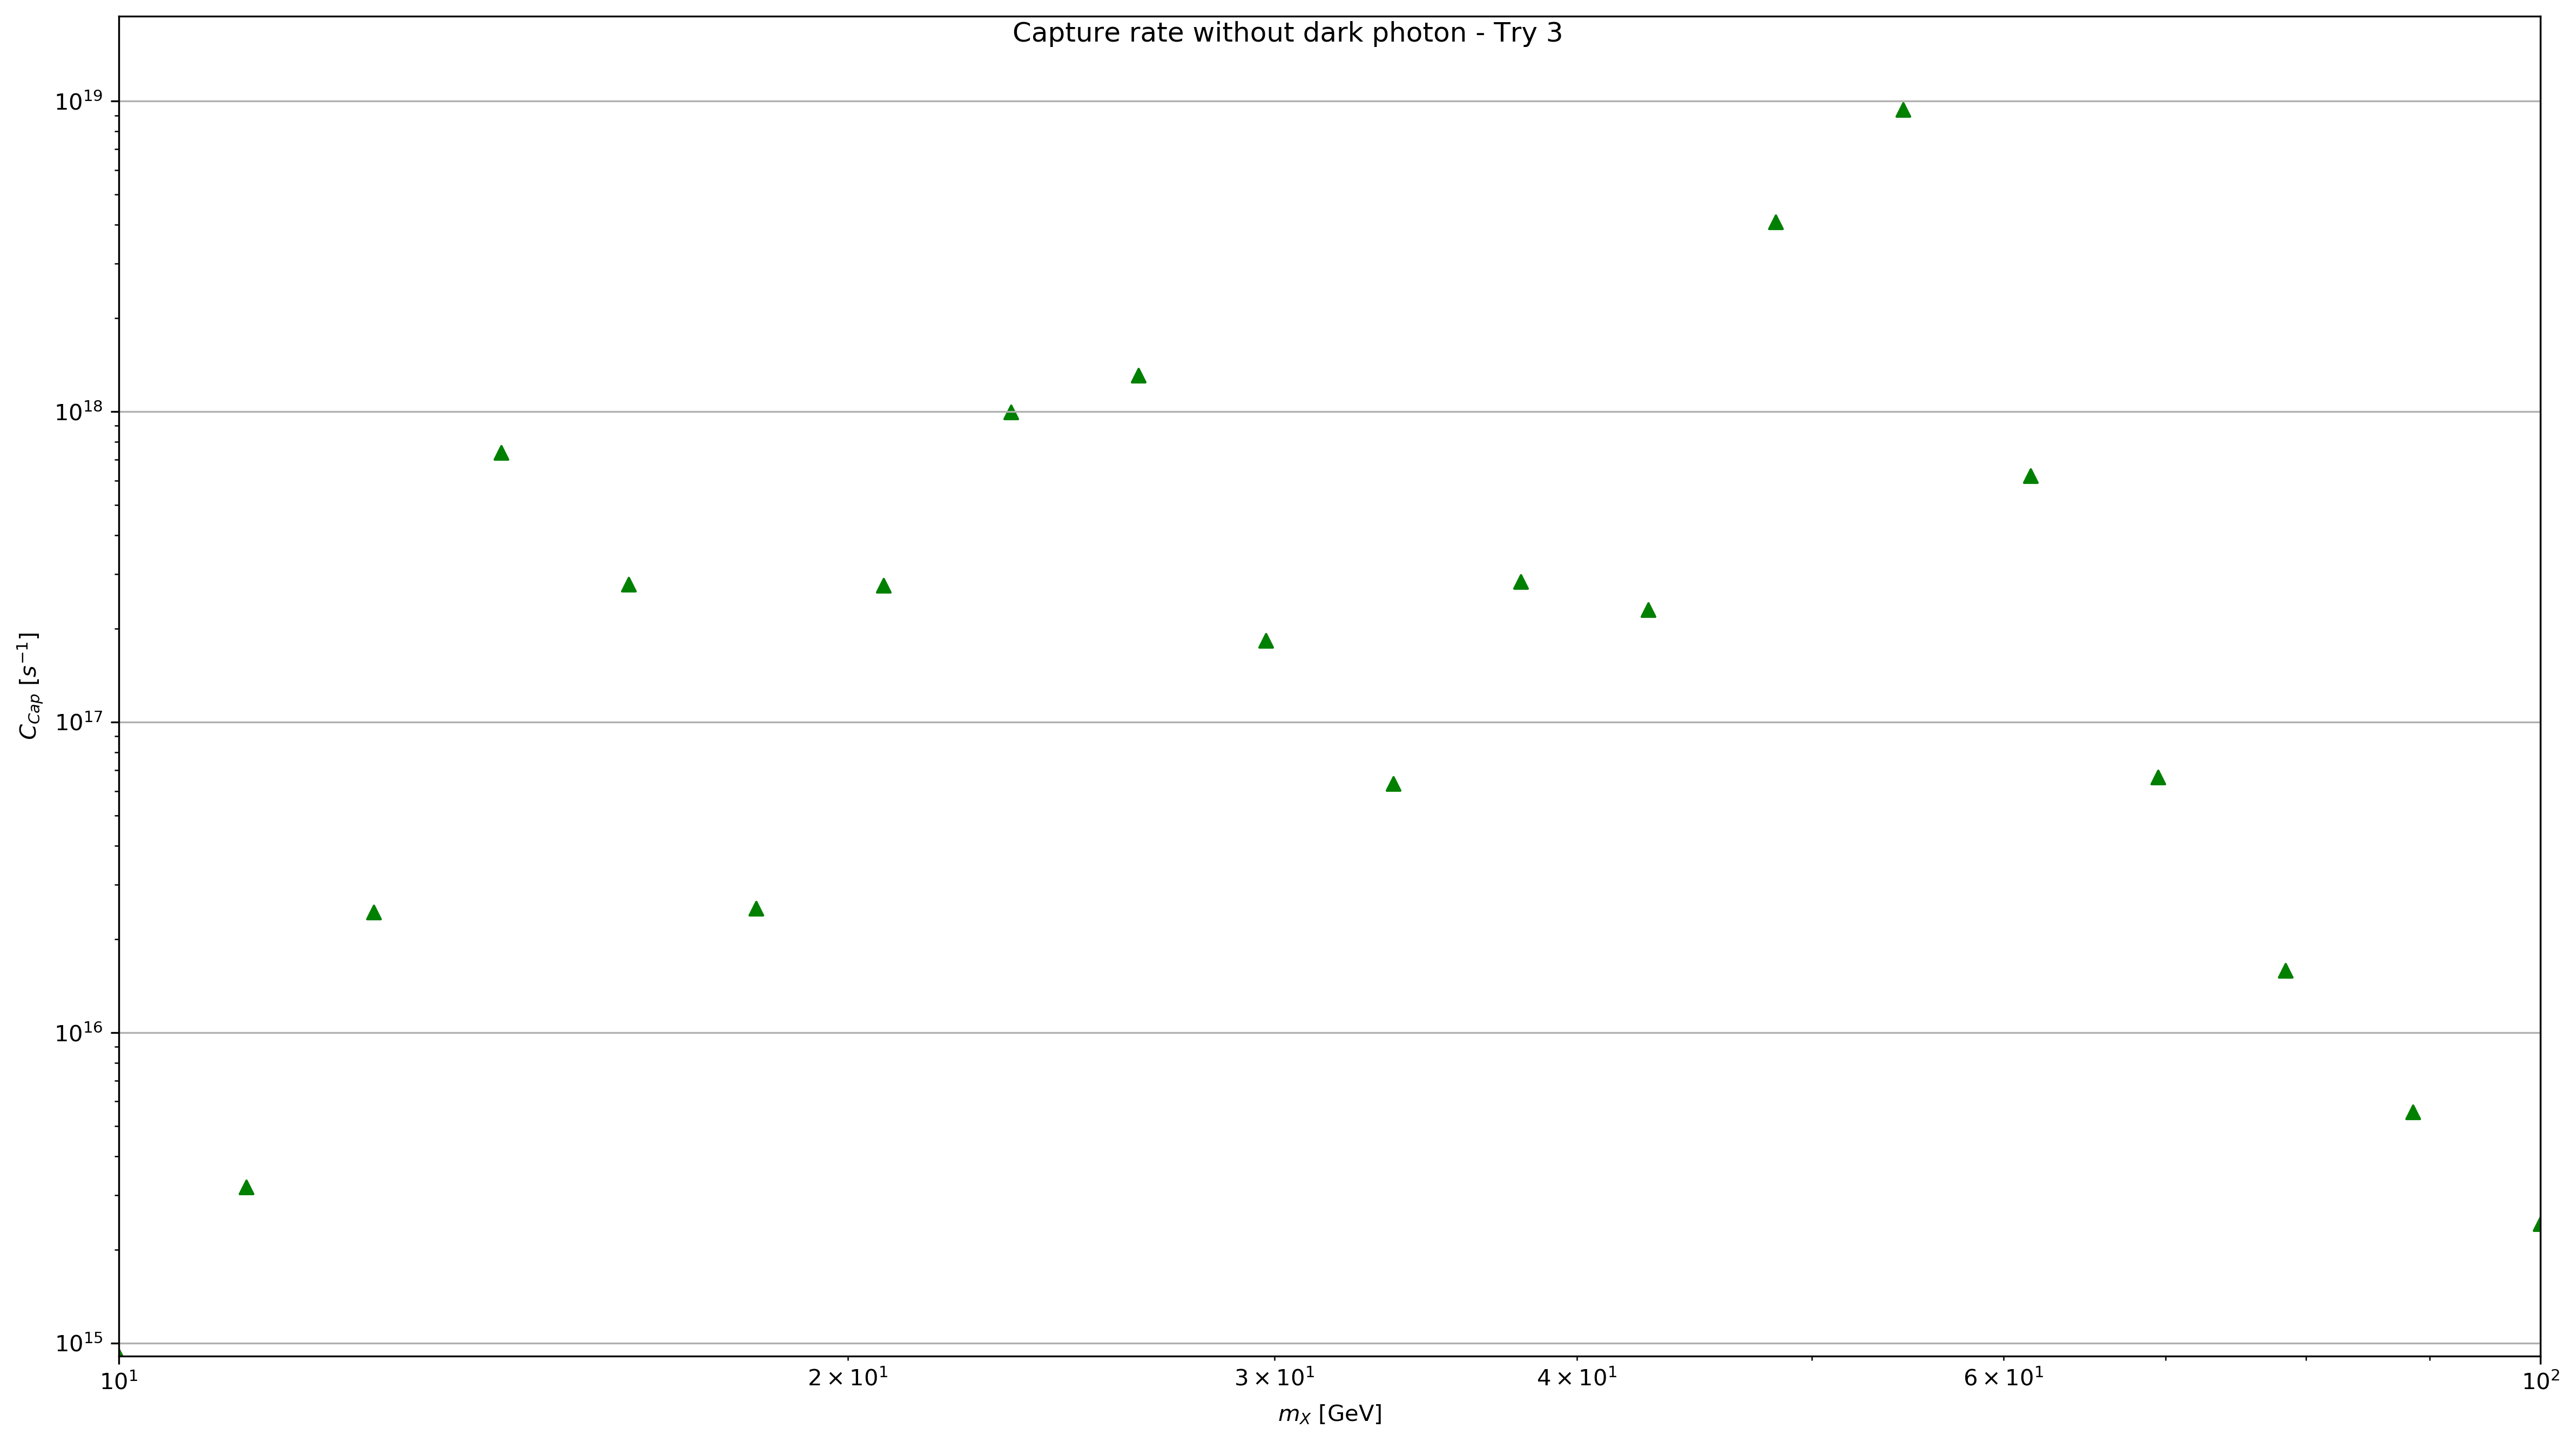

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (16, 9), dpi = 300)

ax.scatter(mx, capNoPhoton, marker = '^', color = 'g')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10, 100)
ax.set_ylim(np.amin(capNoPhoton), np.amax(capNoPhoton)*2)
ax.grid()

ax.set_ylabel('$C_{Cap}$ [$s^{-1}$]')
ax.set_xlabel('$m_X$ [GeV]')

fig.suptitle("Capture rate without dark photon - Try 3")
fig.tight_layout()

In [11]:
fig.savefig("data/Capture_rate_NP3")

This looks way better ! But the magnitude of the capture rate seems off

Now that I'm confident enough that the shape is right, let's compute capture rate values for the whole mx range from 10 to 10000 GeV

Let's copy the code from attempt 1, and delete the 1e-42 factor

# Computation over the 10 - 10000 GeV $m_\chi$ range

In [12]:
########################
# Kinematics
########################
def eMin(u, m_X):
	'''
	eMin(u, m_X)

	Returns the minimum kinetic energy to become Gravitationally captured by Earth

	[m_X] = GeV
	'''

	function = (0.5) * m_X * u**2
#     assert (function >=0), '(u, m_X): (%e,%e) result in a negative eMin' % (u, m_X)
	return function

def eMax(element, m_X, rIndex, u):
	'''
	eMax(element, m_X, rIndex, u)

	Returns the maximum kinetic energy allowed by the kinematics

	[m_X] = GeV

	rIndex specifies the index in the escape velocity array escVel2_List[rIndex]
	'''

	m_N = amu2GeV(atomicNumbers[element])
	mu = m_N*m_X / (m_N + m_X)
	vCross2 = (escVel2_List[rIndex])
	function = 2 * mu**2 * (u**2 + vCross2) / m_N
#     assert (function >= 0), '(element, m_X, rIndex, u): (%s, %e, %i, %e) result in negative eMax' %(element, m_X, rIndex, u)
	return function




########################
# Intersection Velocity
########################
def EminEmaxIntersection(element, m_X, rIndex):
	'''
	EminEmaxIntersection(element, m_X, rIndex):

	Returns the velocity uInt when eMin = eMax.

	[m_X] = GeV

	'''
	m_N = amu2GeV(atomicNumbers[element])
	mu = (m_N*m_X)/(m_N+m_X)

	sqrtvCross2 = np.sqrt(escVel2_List[rIndex])
	# Calculate the intersection uInt of eMin and eMax given a specific rIndex
	A = m_X/2. 
	B = 2. * mu**2 / m_N
	uInt = np.sqrt( ( B ) / (A-B) ) * sqrtvCross2

	return uInt




########################
# Photon Velocity and Energy Integration
########################
def intDuDEr(element, rIndex, m_X):
	'''
	intDuDER(element, m_X, rIndex):

	Returns the evaluated velocity and recoil energy integrals for dark photon scattering

	[m_X] = GeV
	'''
    
	def integrand(u):
		fu = fCrossInterp(u)
		integrand = u * fu * (u **2 + escVel2_List[rIndex])

		return integrand

	# Calculate the intersection uInt of eMin and eMax given a specific rIndex
	uInt = EminEmaxIntersection(element, m_X, rIndex)

	uLow = 0
	uHigh = min(uInt, V_gal) # We take the minimal value between the intersection velocity and galactic escape velocity
	integral = integrate.quad(integrand, uLow, uHigh)[0]
	return integral



## Computing the velocity integrals

This is the step that I cannot optimise in terms of computing time :
It all depends on integrating the function, and I don't know of any ways to vectorise computing integrals.

So this will be the part of the code that will be the longest to compute.
I have evaluated the integrals over all elements, all radi, and all mx in the 10-10000 GeV range, and saved it in a npy file.

We define the mx distribution as a logarithmically evenly space distribution ranging from 10 GeV to 10 TeV.

In [13]:
mx = np.logspace(1, 4, 200)

```Python
velocityIntegral = np.empty((len(radius_List), len(element_List), len(mx)))
for i in range(len(radius_List)) :
    print(i)
    for j, element in enumerate(element_List) :
        for k, m in enumerate(mx) :
            velocityIntegral[i, j, k] = intDuDEr(element, i, m)
np.save('data/NP3_velocityIntegral', velocityIntegral) 
```

In [14]:
velocityIntegral = np.load('data/NP3_velocityIntegral.npy')

## Summing over all radi

### The long version

So this is the part that is extremely slow to compute, but that can be boosted.
Basically, this bit of code is just nesting for loops into for loops which is higly unefficient.

I have tried running it as it is, looping over all elements, all masses and all radi, but it took pretty much about 6-7 hours to finish computing.

In the meantime I rewrote that bit of code to run in less than 5 minutes, taking advantage of numpy operations.
Below is the DarkCapPy version, where I just replaced intDuDEr(element, m_X, m_A, i) by velocityIntegral[i, element, m_X], as we already computed all those values.

In [15]:
## Very very very very sloooooooooooooooooooooooooow
########################
# Sum Over Radii
########################
def sumOverR(element, m_X):
	'''
	sumOverR(element, m_X)

	Returns the summation over radius of the velocity and recoil energy integration

	[m_X] = GeV
	'''

	tempSum = 0
    
	for i in range(0, len(radius_List)):
		r = radius_List[i]
		deltaR = deltaR_List[i]

		n_N = numDensity_Func(element)[i]
		j = np.where(element_List == element)
		k = np.where(mx == m_X)
		summand = n_N * r**2 * velocityIntegral[i, j, k] * deltaR 
		tempSum += summand
	return tempSum



```Python
sumOverRadi = np.empty((len(mx), len(element_List)))

for j, element in enumerate(element_List) :
    print(element)
    for k, m in enumerate(mx) :
        print(m)
        sumOverRadi[k, j] = sumOverR(element, m)
        
sumOverRadi = pd.DataFrame(data = sumOverRadi)
sumOverRadi = sumOverRadi.transpose()
sumOverRadi.columns = element_List
sumOverRadi.to_csv('data/NP3sumOverRadi')
```

Because this a very slow computation, I have saved the result in a csv file, that we can recall

In [16]:
sumOverRadiLong = pd.read_csv('data/NP3sumOverRadi', index_col = 0)

In [17]:
sumOverRadiLong

,O16,Na,Mg,Al,Si,P,S,Ca,Cr,Fe,Ni
0,4.149594e+41,1.576543e+38,1.046737e+40,5.863639e+38,5.437926e+39,2.657277e+37,1.842081e+38,1.237600e+38,2.044214e+37,1.247996e+39,6.241012e+37
1,5.858644e+41,1.870017e+38,1.228995e+40,6.726499e+38,6.200795e+39,2.999329e+37,2.062095e+38,1.355535e+38,2.201514e+37,1.339173e+39,6.681499e+37
2,8.561169e+41,2.238630e+38,1.454911e+40,7.764256e+38,7.111135e+39,3.402087e+37,2.318353e+38,1.488938e+38,2.375290e+37,1.439373e+39,7.163941e+37
3,1.303953e+42,2.707181e+38,1.737947e+40,9.022455e+38,8.205563e+39,3.879388e+37,2.618526e+38,1.640425e+38,2.567775e+37,1.549753e+39,7.693514e+37
4,2.089551e+42,3.310649e+38,2.096713e+40,1.056128e+39,9.531900e+39,4.448952e+37,2.972283e+38,1.813153e+38,2.781575e+37,1.671652e+39,8.276179e+37
...,...,...,...,...,...,...,...,...,...,...,...
195,9.496139e+36,5.844846e+34,4.937784e+36,5.095995e+35,5.627972e+36,3.772290e+34,3.455302e+35,5.517319e+35,2.194984e+35,1.683927e+37,9.848622e+35
196,9.169997e+36,5.643522e+34,4.767633e+36,4.920174e+35,5.433716e+36,3.641977e+34,3.335840e+35,5.325933e+35,2.118464e+35,1.625127e+37,9.504294e+35
197,8.855128e+36,5.449196e+34,4.603401e+36,4.750483e+35,5.246240e+36,3.516220e+34,3.220561e+35,5.141290e+35,2.044667e+35,1.568424e+37,9.172281e+35
198,8.551137e+36,5.261620e+34,4.444879e+36,4.586706e+35,5.065301e+36,3.394854e+34,3.109315e+35,4.963146e+35,1.973491e+35,1.513742e+37,8.852123e+35


### The short  version

This version saves us a lot of time. Using numpy arrays, we can compute the value of tempSum for all radi at once (instead of having to loop 490 times for each element and each mass).

In [18]:
def sumOverRVect(element, m_X) :
    
    radius = np.array(radius_List)
    deltaR = np.array(deltaR_List)
    n_N = np.array(numDensity_Func(element))
    
    j = np.where(element_List == element)[0][0]
    k = np.where(mx == m_X)[0][0]
    
    tempSum = radius ** 2 * n_N * deltaR * velocityIntegral[: , j , k] #Here it would be better if I could
    #just contract the whole 3D array with the 1D ones. I tried n_N[:, None, None] * radius[:, None, None] ** 2
    # etc.. But it did not give the same results.
    
    return np.sum(tempSum)

Let's compare them for $m_\chi = 10$ GeV and element = 'O16' :

In [235]:
%%timeit
sumOverRVect('O16', 10)

7.13 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [236]:
%%timeit
sumOverR('O16', 10)

3.52 s ± 46.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Ok, so using numpy arrays, we are running the code about 500 times faster.

Let's compute the same array as the long version, and see if they match.


In [19]:
sumOverRadi = np.empty((len(mx), len(element_List)))

for j, element in enumerate(element_List) :
    for k, m in enumerate(mx) :
        sumOverRadi[k, j] = sumOverRVect(element, m)
        

In [20]:
sumOverRadi = pd.DataFrame(data = sumOverRadi)
sumOverRadi.columns = element_List

In [21]:
sumOverRadi

,O16,Na,Mg,Al,Si,P,S,Ca,Cr,Fe,Ni
0,4.149594e+41,1.576543e+38,1.046737e+40,5.863639e+38,5.437926e+39,2.657277e+37,1.842081e+38,1.237600e+38,2.044214e+37,1.247996e+39,6.241012e+37
1,5.858644e+41,1.870017e+38,1.228995e+40,6.726499e+38,6.200795e+39,2.999329e+37,2.062095e+38,1.355535e+38,2.201514e+37,1.339173e+39,6.681499e+37
2,8.561169e+41,2.238630e+38,1.454911e+40,7.764256e+38,7.111135e+39,3.402087e+37,2.318353e+38,1.488938e+38,2.375290e+37,1.439373e+39,7.163941e+37
3,1.303953e+42,2.707181e+38,1.737947e+40,9.022455e+38,8.205563e+39,3.879388e+37,2.618526e+38,1.640425e+38,2.567775e+37,1.549753e+39,7.693514e+37
4,2.089551e+42,3.310649e+38,2.096713e+40,1.056128e+39,9.531900e+39,4.448952e+37,2.972283e+38,1.813153e+38,2.781575e+37,1.671652e+39,8.276179e+37
...,...,...,...,...,...,...,...,...,...,...,...
195,9.496139e+36,5.844846e+34,4.937784e+36,5.095995e+35,5.627972e+36,3.772290e+34,3.455302e+35,5.517319e+35,2.194984e+35,1.683927e+37,9.848622e+35
196,9.169997e+36,5.643522e+34,4.767633e+36,4.920174e+35,5.433716e+36,3.641977e+34,3.335840e+35,5.325933e+35,2.118464e+35,1.625127e+37,9.504294e+35
197,8.855128e+36,5.449196e+34,4.603401e+36,4.750483e+35,5.246240e+36,3.516220e+34,3.220561e+35,5.141290e+35,2.044667e+35,1.568424e+37,9.172281e+35
198,8.551137e+36,5.261620e+34,4.444879e+36,4.586706e+35,5.065301e+36,3.394854e+34,3.109315e+35,4.963146e+35,1.973491e+35,1.513742e+37,8.852123e+35


At first glance, they look the same. But if we look closely, the value themselves are slightly different.

In [22]:
np.around(sumOverRadiLong['O16'].values, -10) == np.around(sumOverRadi['O16'].values, -10)

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False,

The question here, is to determine whether those difference have any significance.
So we'll have a quick look at how much they differ :

In [23]:
n = 0
while ((np.around(sumOverRadiLong, -n) != np.around(sumOverRadi, -n)).any()).any() :
    
    n = n+1
print (n)    

31


Ok, so it looks like the two dataframe start showing difference at $10^{31}$. So it is safe to say that those differences are not significant. Although, doing it this way gives an quick idea on whether or not it is safe to use those data, we should determine the number of identical numbers for every single value to caracterise it better.

In [24]:
decimals = sumOverRadi.copy()
for element in element_List :
    short = sumOverRadi[element].values
    long = sumOverRadiLong[element].values
    dec = np.empty_like(short)
    
    for i in range(len(short)) :
        n = 0
        
        while (np.around(short[i], -n) != np.around(long[i], -n)) :
            n = n+1
        dec[i] = n
    decimals[element] = dec

This bit does not give us the numbers of identical digits, but the the order from which the digits starts being different.
So for 016 and mass 10 GeV, the differences starts showing at $10^{27}$, which gives us 14 identical numbers for that value.

In [25]:
decimals

,O16,Na,Mg,Al,Si,P,S,Ca,Cr,Fe,Ni
0,27.0,24.0,26.0,25.0,0.0,23.0,24.0,0.0,22.0,25.0,23.0
1,28.0,24.0,25.0,25.0,0.0,24.0,24.0,24.0,24.0,24.0,0.0
2,27.0,24.0,0.0,24.0,26.0,24.0,24.0,0.0,23.0,25.0,23.0
3,27.0,1.0,26.0,26.0,0.0,22.0,0.0,2.0,23.0,0.0,24.0
4,28.0,4.0,25.0,4.0,26.0,23.0,24.0,0.0,23.0,24.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
195,23.0,20.0,22.0,0.0,23.0,0.0,21.0,21.0,21.0,23.0,22.0
196,2.0,20.0,23.0,21.0,22.0,0.0,21.0,21.0,21.0,23.0,21.0
197,23.0,20.0,5.0,21.0,7.0,21.0,1.0,1.0,21.0,23.0,20.0
198,22.0,0.0,23.0,21.0,22.0,20.0,20.0,22.0,20.0,23.0,4.0


Yep, this looks good.
It would be interesting to try and find why there is a difference though..

## Computing the capture rate

The long computing part has been done, now is the last step to compute the capture rate.

Here again, I have changed the way the code behave, so that it would take advantage of numpy operation, and compute the capture rate for all masses at once. (actually, the cCap function is unchanged, it's only the singleElementCap that has been modified)

I did not bother trying to do the same for the loop on elements, because there is only few of them, that it did not look worth the hassle.

Another thing I added in the vectorised function, is an array that save the capture rate for each element, which is being returned at the same time as the sum over all element. It's not really usefull for now, but it is nice to see  each individual peak

In [26]:
sumOverRadi

,O16,Na,Mg,Al,Si,P,S,Ca,Cr,Fe,Ni
0,4.149594e+41,1.576543e+38,1.046737e+40,5.863639e+38,5.437926e+39,2.657277e+37,1.842081e+38,1.237600e+38,2.044214e+37,1.247996e+39,6.241012e+37
1,5.858644e+41,1.870017e+38,1.228995e+40,6.726499e+38,6.200795e+39,2.999329e+37,2.062095e+38,1.355535e+38,2.201514e+37,1.339173e+39,6.681499e+37
2,8.561169e+41,2.238630e+38,1.454911e+40,7.764256e+38,7.111135e+39,3.402087e+37,2.318353e+38,1.488938e+38,2.375290e+37,1.439373e+39,7.163941e+37
3,1.303953e+42,2.707181e+38,1.737947e+40,9.022455e+38,8.205563e+39,3.879388e+37,2.618526e+38,1.640425e+38,2.567775e+37,1.549753e+39,7.693514e+37
4,2.089551e+42,3.310649e+38,2.096713e+40,1.056128e+39,9.531900e+39,4.448952e+37,2.972283e+38,1.813153e+38,2.781575e+37,1.671652e+39,8.276179e+37
...,...,...,...,...,...,...,...,...,...,...,...
195,9.496139e+36,5.844846e+34,4.937784e+36,5.095995e+35,5.627972e+36,3.772290e+34,3.455302e+35,5.517319e+35,2.194984e+35,1.683927e+37,9.848622e+35
196,9.169997e+36,5.643522e+34,4.767633e+36,4.920174e+35,5.433716e+36,3.641977e+34,3.335840e+35,5.325933e+35,2.118464e+35,1.625127e+37,9.504294e+35
197,8.855128e+36,5.449196e+34,4.603401e+36,4.750483e+35,5.246240e+36,3.516220e+34,3.220561e+35,5.141290e+35,2.044667e+35,1.568424e+37,9.172281e+35
198,8.551137e+36,5.261620e+34,4.444879e+36,4.586706e+35,5.065301e+36,3.394854e+34,3.109315e+35,4.963146e+35,1.973491e+35,1.513742e+37,8.852123e+35


In [27]:
def singleElementCapVect(element, m_X):
	'''
	singleElementCap(element, m_X)

	Returns the capture rate due to a single element for the specified parameters

	[m_X] = GeV
	'''
	n_X = 0.3/m_X # GeV/cm^3

	conversion = (5.06e13)**-3 * (1.52e24) # Conversion to seconds (cm^-3)(GeV^-2) -> (s^-1)
	prefactors = (4*np.pi)**2
	function = n_X * conversion * prefactors * sumOverRadi[element].values * crossSection(element, m_X)
	return function

In [28]:

def cCapVect(m_X):
	'''
	cCap(m_X, m_A, epsilon, alpha, alpha_X)

	returns the full capture rate in sec^-1 for the specified parameters

	Note: This function is the less efficient way to perform this calculation. Every point in (m_A, epsilon) space 
		involves peforming the full tripple integral over recoil energy, incident DM velocity, and Earth radius
		which is time consuming.

	[m_X] = GeV
	'''
	totalCap = 0
	elementCapList = np.empty_like(element_List)
	for i, element in enumerate(element_List):
		elementCap = singleElementCapVect(element, m_X)
		elementCapList[i] = elementCap
		totalCap += elementCap 
	return (totalCap, elementCapList)


In [29]:
def singleElementCap(element, m_X):
	'''
	singleElementCap(element, m_X)

	Returns the capture rate due to a single element for the specified parameters

	[m_X] = GeV
	'''
	n_X = 0.3/m_X # GeV/cm^3

	conversion = (5.06e13)**-3 * (1.52e24) # Conversion to seconds (cm^-3)(GeV^-2) -> (s^-1)
	prefactors = (4*np.pi)**2
	function = n_X * conversion * prefactors * sumOverRadi[element][np.where(mx == m_X)[0]] * crossSection(element, m_X)
	return function

In [30]:

def cCap(m_X):
	'''
	cCap(m_X, m_A, epsilon, alpha, alpha_X)

	returns the full capture rate in sec^-1 for the specified parameters

	Note: This function is the less efficient way to perform this calculation. Every point in (m_A, epsilon) space 
		involves peforming the full tripple integral over recoil energy, incident DM velocity, and Earth radius
		which is time consuming.

	[m_X] = GeV
	'''
	totalCap = 0
	for element in element_List:
		elementCap = singleElementCap(element, m_X)
		totalCap += elementCap 
	return totalCap


In [233]:
%%timeit
cCapVect(mx)

209 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [228]:
%%timeit
capNoPhoton = np.empty_like(mx)
for i, m in enumerate(mx) :
    capNoPhoton[i] = cCap(m)


1.9 s ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### This time again, it makes it way faster to compute the capture rate. About  10000 time faster !

In [31]:
capNoPhoton, capNoPhotonElement = cCapVect(mx)

And plot it !

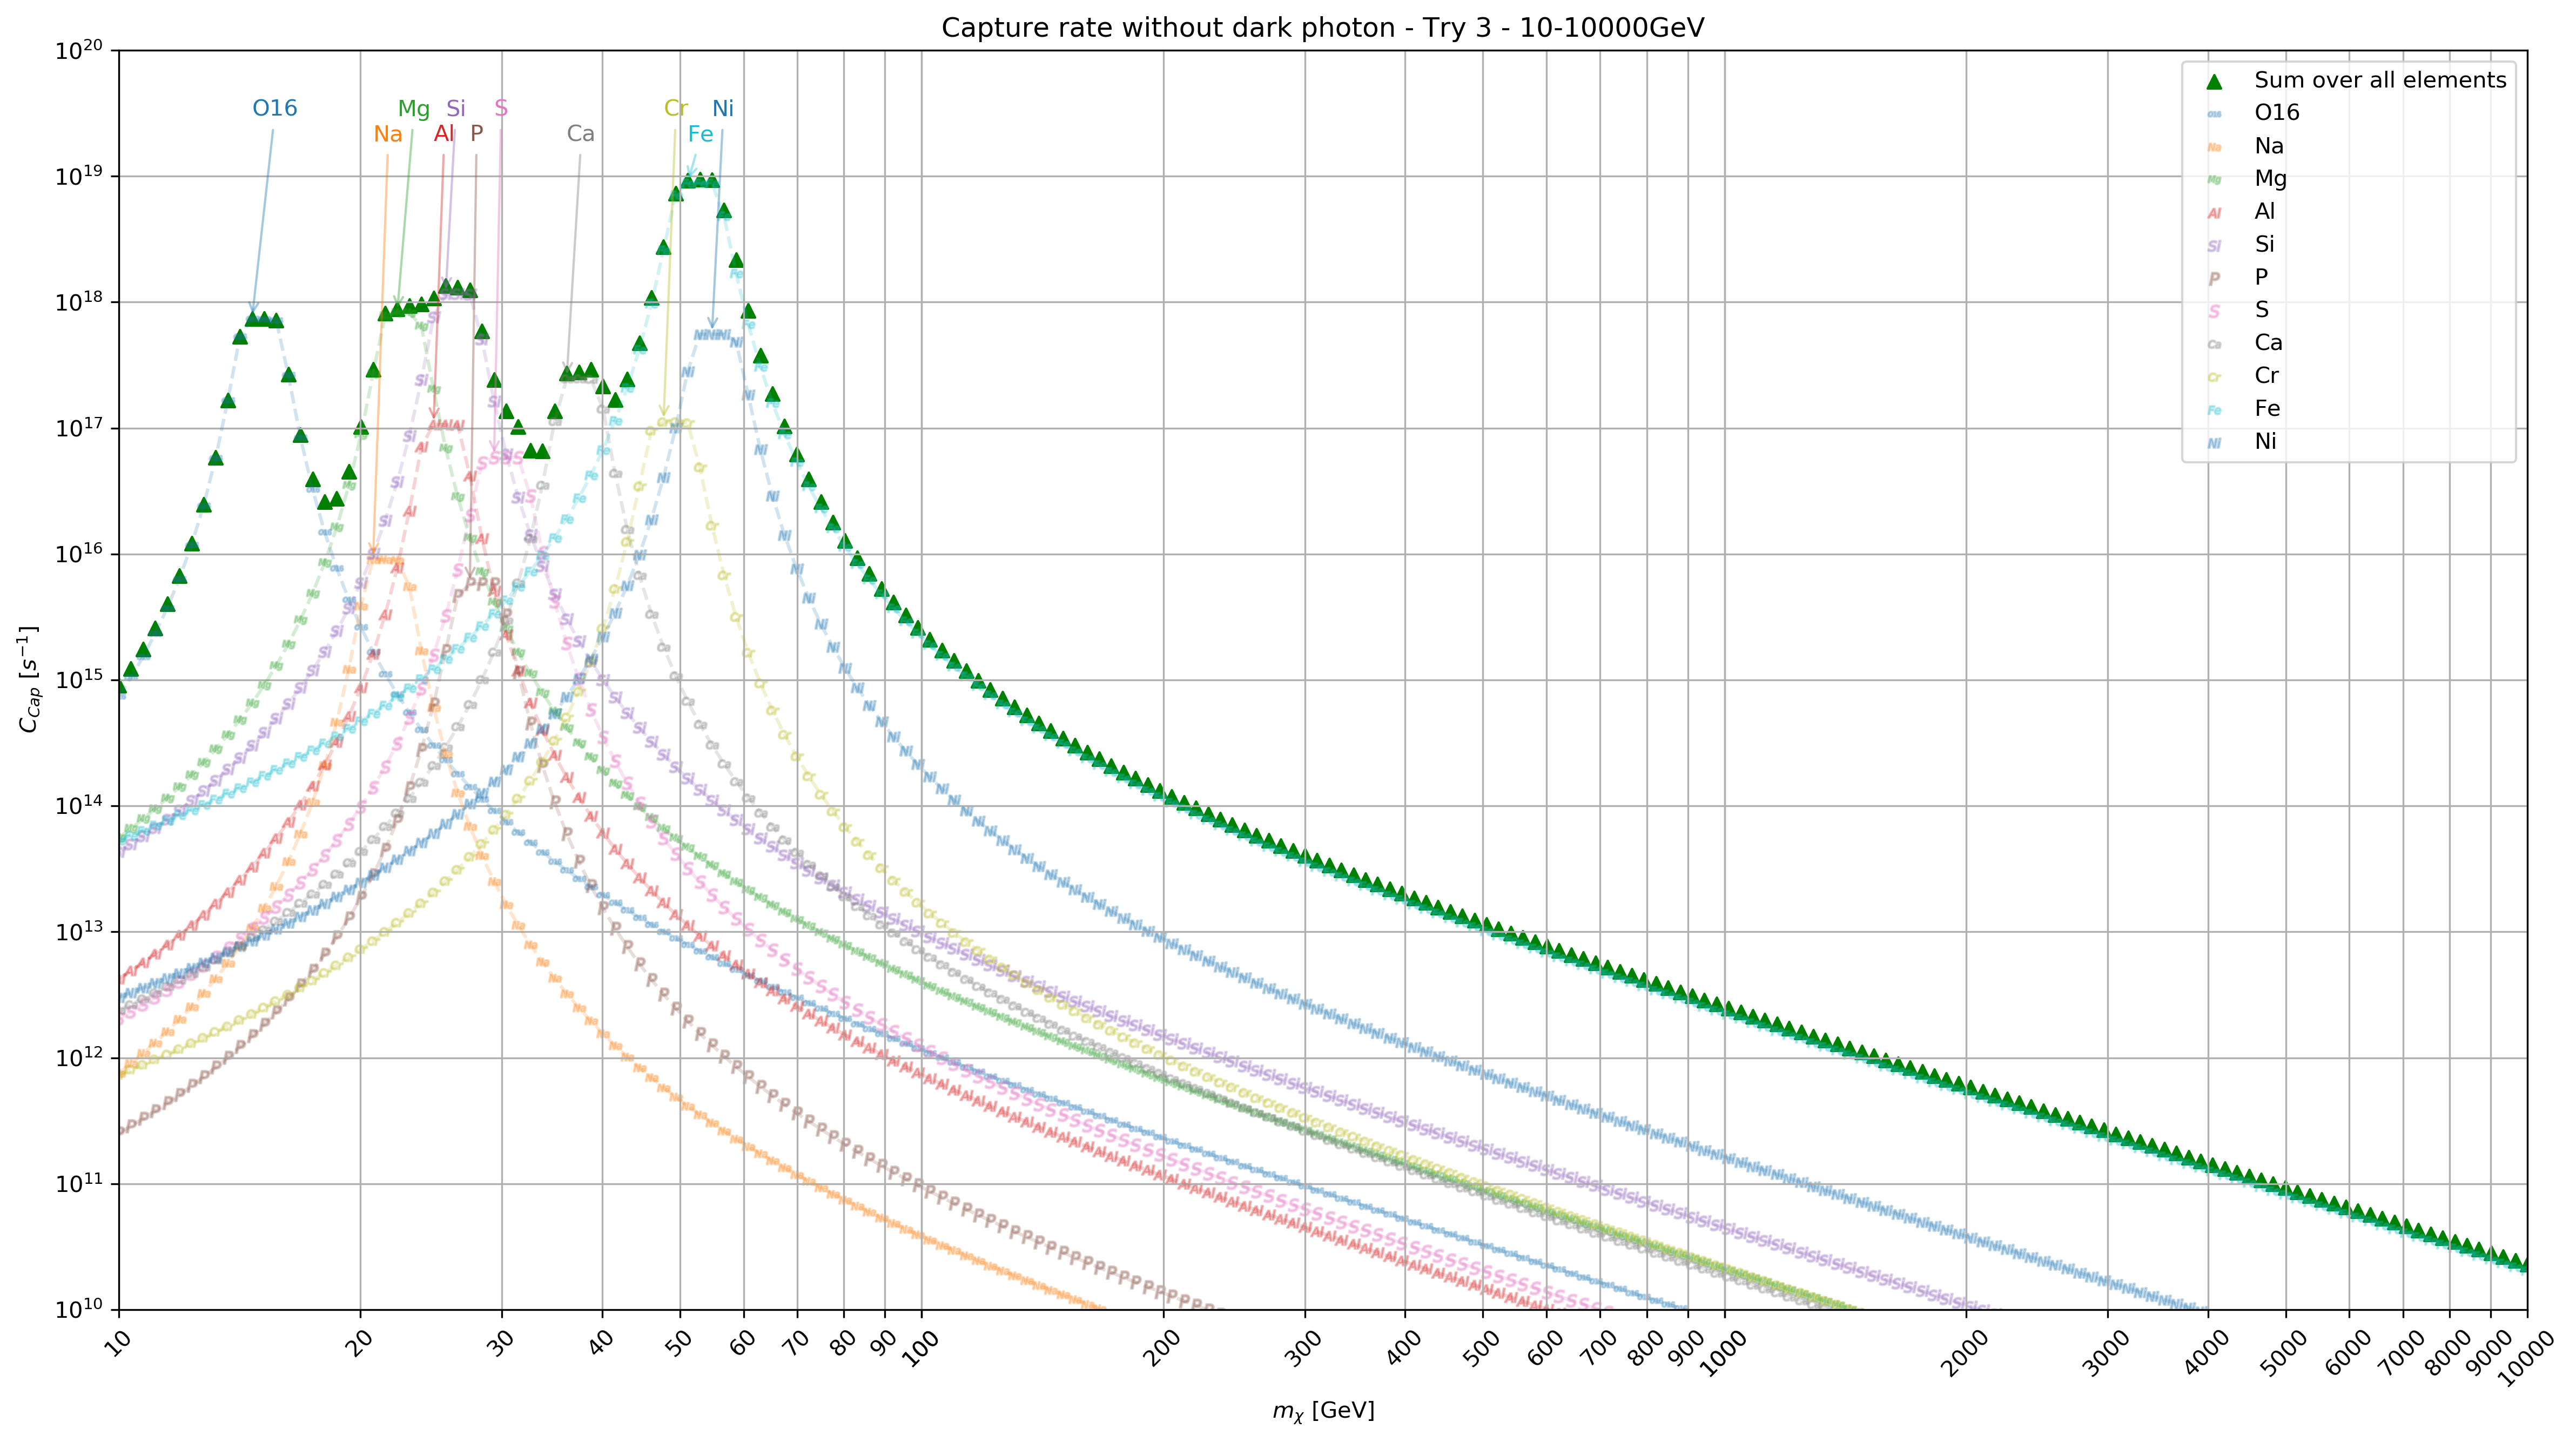

In [62]:
fig, ax = plt.subplots(1, 1, figsize = (16, 9), dpi = 300)


ax.scatter(mx, capNoPhoton, marker = '^', color = 'g', label = 'Sum over all elements')

for i, capElement in enumerate(capNoPhotonElement) :
    
    
    y = np.amax(capElement)
    x = mx[np.where(capElement == y)]
    
    ax.scatter(mx, capElement, label = element_List[i], marker = '$'+element_List[i]+'$',
               s = 30, color = ('C' + str(i)), alpha = 0.3)    
    ax.plot(mx, capElement, ls = '--', color = ('C' + str(i)), alpha = 0.2)
    
    if i % 2 == 0 :
        y_offset = 10 ** 19
    else :
        y_offset = -10 ** 18
        
    ax.annotate(element_List[i], (x, y),
               xytext = (x, 2 * 10**19 + y_offset), 
                arrowprops = dict(arrowstyle = '->', color = ('C' + str(i)), alpha = 0.4), color = ('C' + str(i)))

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10, 10000)
ax.set_ylim(np.amin(capNoPhoton))

ax.set_yticks(np.logspace(10, 20, 11))
x_ticks = np.concatenate((np.linspace(10, 100, 10), 
                                    np.linspace(10, 100, 10)*10, np.linspace(10, 100, 10)*100)).astype(int)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation = 45)
ax.grid()

ax.legend()
ax.set_ylabel('$C_{Cap}$ [$s^{-1}$]')
ax.set_xlabel('$m_\chi$ [GeV]')

ax.set_title("Capture rate without dark photon - Try 3 - 10-10000GeV")
fig.tight_layout()

So the shape looks alright, except for a couple artefacts :
- There is a hole just before the Iron peak
- All peaks seems to have been flattened at the top

Also, we can see that the magnitude is off.

In [63]:
fig.savefig('data/capture_rate_NP3200')